# Fundamentals of Data Science
## Analysing UK census data to drive insights

In [1]:
# install sweetviz to get an visualize overview of the data
#!pip install --upgrade pip
#!pip install sweetviz

In [2]:
# import all required libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt
import sweetviz as sv
plt.style.use('ggplot')

In [3]:
#read in census data using pandas
data = pd.read_csv('census_08_2022.csv')

In [4]:
data.head() # check the first 5 rows of the data

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,Dixon Drive,Leon,Clark,64,Head,Married,Male,"Engineer, energy",None,Christian
1,1,1,Dixon Drive,Lauren,Turnbull,63,Wife,Married,Female,Psychiatrist,None,Christian
2,2,2,Dixon Drive,Katie,Kirby,57,Head,Single,Female,Unemployed,None,Christian
3,3,2,Dixon Drive,Jordan,Kirby,30,Son,Single,Male,"Engineer, biomedical",None,Christian
4,4,2,Dixon Drive,Gareth,Kirby,28,Son,Single,Male,"Surveyor, building control",None,Christian


In [5]:
data = data.drop('Unnamed: 0',axis =1) #drop unamed column as it is not required

In [6]:
print(data.columns) # all the data attributes

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')


In [7]:
data.info() # metadata about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8660 entries, 0 to 8659
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8660 non-null   int64 
 1   Street                         8660 non-null   object
 2   First Name                     8660 non-null   object
 3   Surname                        8660 non-null   object
 4   Age                            8660 non-null   object
 5   Relationship to Head of House  8660 non-null   object
 6   Marital Status                 6780 non-null   object
 7   Gender                         8660 non-null   object
 8   Occupation                     8660 non-null   object
 9   Infirmity                      8660 non-null   object
 10  Religion                       6720 non-null   object
dtypes: int64(1), object(10)
memory usage: 744.3+ KB


In [8]:
# dictionary of isblanks rows for each column:
blanks_dict = {}
for col in list(data.columns):
    try:
        blanks_dict[col] = data[col].str.isspace().sum()
    except Exception as e: 
        print(F"{col} Error: {e}")
        pass
blanks_dict

House Number Error: Can only use .str accessor with string values!


{'Street': 0,
 'First Name': 1,
 'Surname': 0,
 'Age': 0,
 'Relationship to Head of House': 0,
 'Marital Status': 1,
 'Gender': 3,
 'Occupation': 1,
 'Infirmity': 9,
 'Religion': 0}

In [9]:
data[data['House Number']=='']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


First Name, Marital status, Gender, occupation and Infirmity all contains some blanks

In [10]:
data[data['Gender'].str.isspace()] # check blacks for First Name

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
812,8,Dumnonia Drive,Patricia,Henry,21,Daughter,Single,,University Student,None,Christian
5533,2,Patel Vista,Sian,Edwards,64,Lodger,Divorced,,Theme park manager,None,Catholic
5668,37,Butcher Lake,Diana,Warner,72,Head,Married,,Retired Barrister,None,None


In [11]:
data[data['First Name'].str.isspace()] # check blacks for First Name

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7047,7,Bronze Street,,Holland,70,Head,Widowed,Female,Retired Radio producer,None,Catholic


In [12]:
data.query(" `House Number` == 7 and Street== 'Bronze Street'") # check other household with same house number and street

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7047,7,Bronze Street,,Holland,70,Head,Widowed,Female,Retired Radio producer,None,Catholic
7048,7,Bronze Street,Damien,Holland,40,Son,Single,Male,"Teacher, music",Disabled,Catholic


### Use sweetviz to preview the data 

In [13]:
feature_config = sv.FeatureConfig(skip=['House Number', 'Street', 'First Name', 'Surname']) # columns to skip
report_census = sv.analyze([data, 'Census Data'], feat_cfg=feature_config)
report_census.show_html('census_data.html', layout='vertical')

                                             |          | [  0%]   00:00 -> (? left)

Report census_data.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [14]:
#report_census.show_notebook()

In [15]:
# make a copy of the data to work without modifying te original.
df = data.copy()

In [16]:
#check the data dimension i.e the number of rows and column
df.shape

(8660, 11)

In [17]:
# Get sum of missing rows for all columns
#df['Marital Status'].isnull().values.any()
df.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   1880
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         1940
dtype: int64

Note1: There are lots of missing rows for both Marital status and Religion columns. This needs cleaning

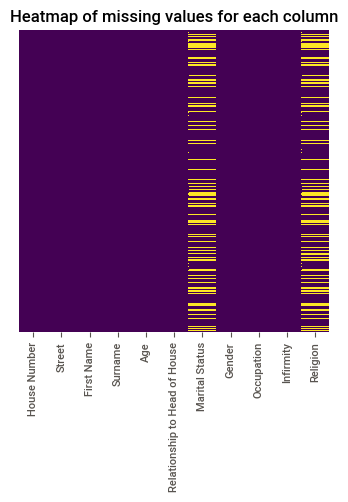

In [18]:
# Another way to visualize null values for each attribute using the heatmap
plt.figure(figsize = (4,4))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis').set_title("Heatmap of missing values for each column")
plt.savefig('missing_values_heatmap_01.png')

In [19]:
# define a json function to save json files
def write_json_file(data, filename='output'):
    """
    This Function write a data to a json file
    Data: The data to be written to json
    filename: name of the output file
    """
    with open(filename+'.json', mode='w') as file:
        json.dump( data, file )

In [20]:
print(list(df.columns))

['House Number', 'Street', 'First Name', 'Surname', 'Age', 'Relationship to Head of House', 'Marital Status', 'Gender', 'Occupation', 'Infirmity', 'Religion']


In [21]:
# Get all unique values for each column and save tpo json file
columns_unique_values = {}
for column in ['Age','Relationship to Head of House','Marital Status','Gender','Infirmity','Religion']:
    columns_unique_values[column] = list(df[column].unique()) 
write_json_file(columns_unique_values, "unique_column_values_01") # save to json file    
print(columns_unique_values)

{'Age': ['64', '63', '57', '30', '28', '26', '66', '69', '18', '17', '55', '54', '22', '8', '20', '21', '19', '25', '23', '45', '37', '49', '16', '27', '10', '70', '77', '43', '41', '35', '48', '36', '51', '40', '9', '78', '79', '72', '7', '5', '46', '6', '3', '2', '83', '0', '24', '1', '34', '56', '58', '59', '13', '32', '44', '29', '50', '84', '81', '31', '72.96085149', '70.96085149', '15', '65', '73', '39', '14', '33', '4', '52', '68', '42', '38', '62', '74', '80', '53', '61', '11', '71', '47', '12', '75', '60', '67', '82', '51.06349086', '58.06349086', '86', '88', '89', '93', '76', '90.52266282', '94.52266282', '87', '85', '104', '111', '101', '92', '102', '99', '119', '125', '96', '94', '95', '90', '76.07454892', 'three', '97', '91', '105', '98', '54.02795928', '58.02795928'], 'Relationship to Head of House': ['Head', 'Wife', 'Son', 'Daughter', 'Husband', 'Granddaughter', 'None', 'Lodger', 'Partner', 'Sibling', 'Visitor', 'Grandson', 'Step-Son', 'Adopted Son', 'Nephew', 'Cousin', 

In [22]:
len(columns_unique_values['Age']) # unique age counts

117

## Data Cleaning:
from previewing the data, there are several cleaning that must to done before subsequent analysis.
### Preliminary cleaning
1. drop `Unnamed` column
2. `Age` column: change age letter 'three' to 3, convert age to int data type, chech age 125
3. `Marital Status`: Rename some values `{'W':'Widowed', 'D':'Divorced', 'S':'Single', 'M':'Married', ' ': np.nan}`. Check and work on blank or missing rows.
4. `Gender` : replace `["F","f","female"]` to `Female` and `["M","m","male"]` to `Male`. Handle  blank rows.
5. `Relationship to Head of House`: check the 'None' rows
6. `Infirmity` : Check and work on blank rows. Does 'None' mean Not applicable or missing..checks this
7. check `Religion`: None and missing rows
8. `Occupation`: Regroup category base on similar groups (word cloud for most occupation)

### Cleaning Age column
1. changing letters to numbers
2. handling data type. Age is an integer

In [23]:
df.query("Age == 'three'") # get row with age 'three'

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4800,79,Fish Drive,Carol,Davison,three,Daughter,NaN,Female,Child,None,NaN


In [24]:
# change age letter 'Three' to 3
df['Age'] = np.where((df['Age'] == 'three'), str(3), df['Age'])

In [25]:
print(df['Age'].unique())

['64' '63' '57' '30' '28' '26' '66' '69' '18' '17' '55' '54' '22' '8' '20'
 '21' '19' '25' '23' '45' '37' '49' '16' '27' '10' '70' '77' '43' '41'
 '35' '48' '36' '51' '40' '9' '78' '79' '72' '7' '5' '46' '6' '3' '2' '83'
 '0' '24' '1' '34' '56' '58' '59' '13' '32' '44' '29' '50' '84' '81' '31'
 '72.96085149' '70.96085149' '15' '65' '73' '39' '14' '33' '4' '52' '68'
 '42' '38' '62' '74' '80' '53' '61' '11' '71' '47' '12' '75' '60' '67'
 '82' '51.06349086' '58.06349086' '86' '88' '89' '93' '76' '90.52266282'
 '94.52266282' '87' '85' '104' '111' '101' '92' '102' '99' '119' '125'
 '96' '94' '95' '90' '76.07454892' '97' '91' '105' '98' '54.02795928'
 '58.02795928']


In [26]:
# Change age data type to integer
ages = []
for i in df['Age']:
    try: 
        ages.append(int(eval(i)))
    except Exception as e:
        print(f"{e}: i")
df['Age'] = ages
print(df['Age'].dtypes)

int64


In [27]:
print(sorted(df['Age'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 104, 105, 111, 119, 125]


In [28]:
df['Age'].isnull().values.any() # There are no missing age observations..verify

False

In [29]:
age_stats = df['Age'].describe() # get statistical information from age column
pd.DataFrame(age_stats.values.round(), index = age_stats.index, columns=['Age']).transpose()

,count,mean,std,min,25%,50%,75%,max
Age,8660.0,38.0,22.0,0.0,20.0,37.0,53.0,125.0


<Figure size 2800x1400 with 0 Axes>

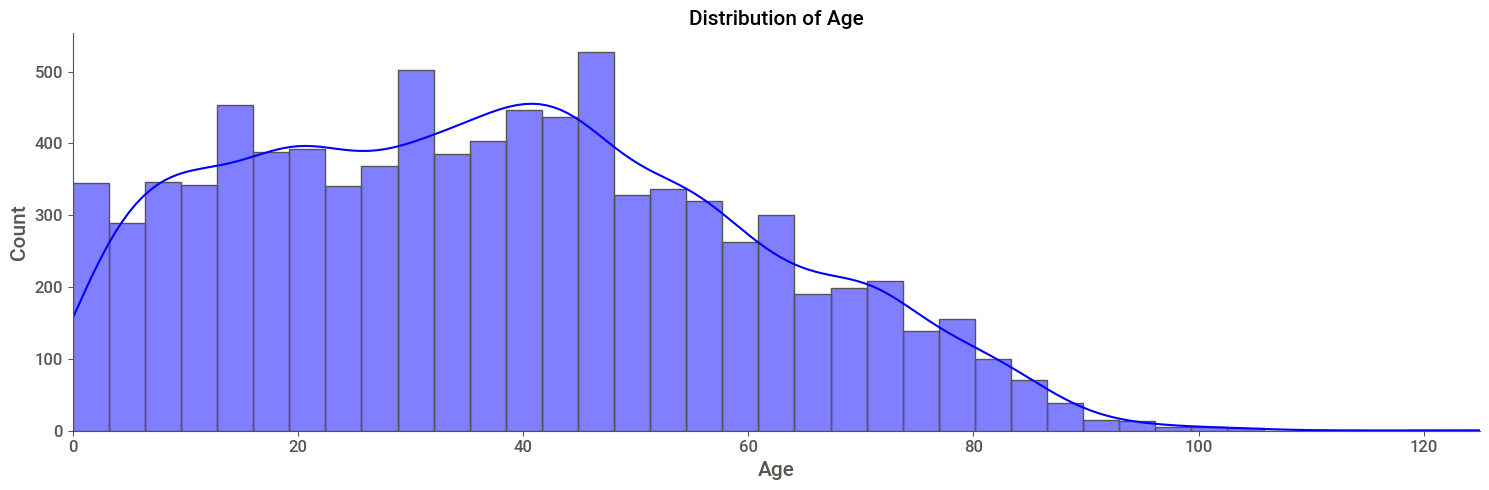

In [30]:
plt.figure(figsize=(14,7), dpi=200)
sns.displot(df['Age'], kind='hist', kde=True, height=5, aspect=3, color="blue")
plt.xlim(df['Age'].min(), df['Age'].max())
plt.title("Distribution of Age", fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel("Count", fontsize=15)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('age_distribution.png')
plt.show()

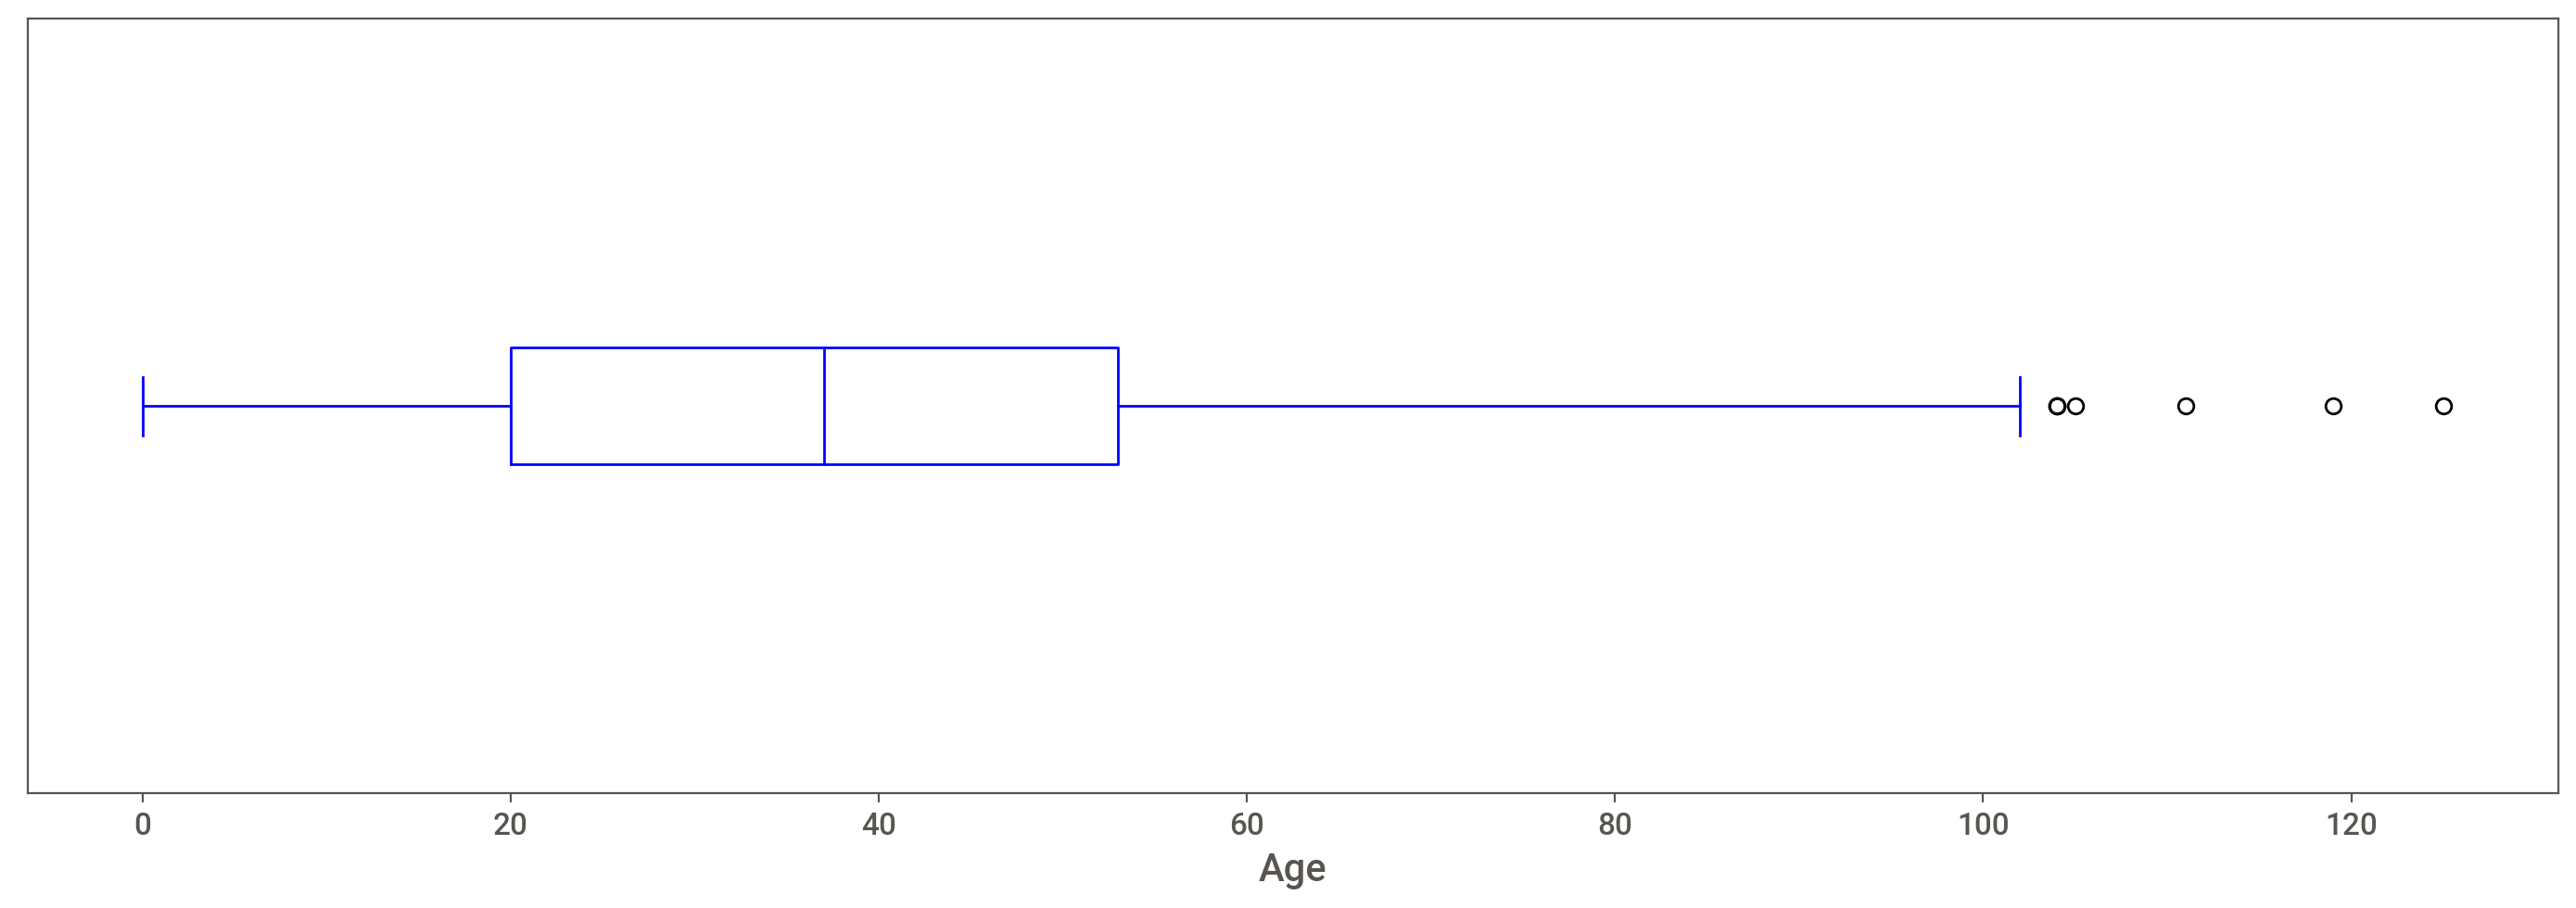

In [31]:
# Using Boxplot to visualize the age distribution to check for outliers
plt.figure(figsize=(14,5), dpi=200)
df["Age"].plot(kind="box", vert=False, color="blue")
#plt.title("Age distribution", fontsize=15)
plt.xlabel("Age", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks([0], [''])
plt.tight_layout()
plt.savefig("raw_Age_boxplot.png")
plt.show()

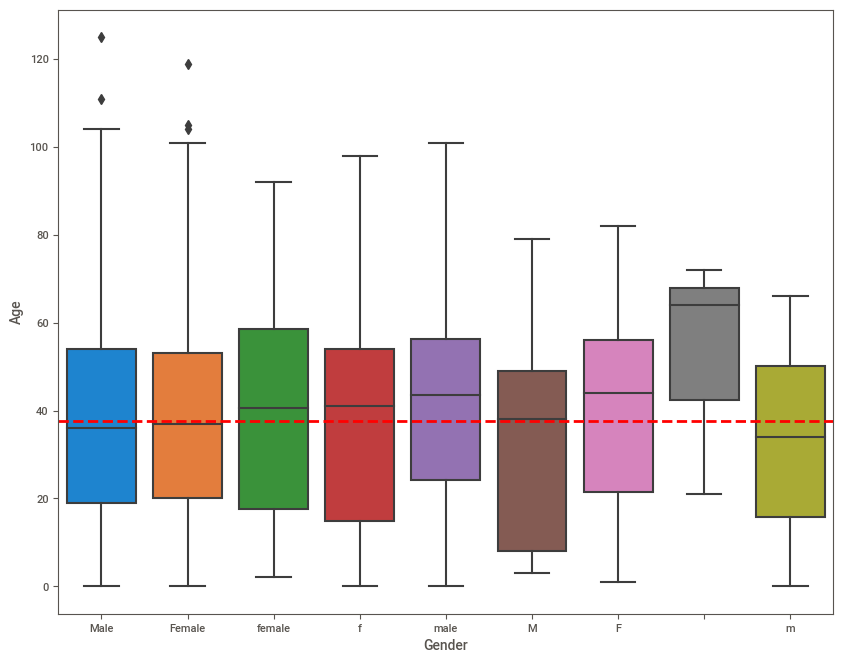

In [32]:
# plotting the Age on the charts with respect to sex
plt.figure(figsize=(10,8))
sns.boxplot(x = 'Gender', y = 'Age', data = df)
plt.axhline(df["Age"].mean(),color='r',linestyle='dashed',linewidth=2)# add mean age line

In [33]:
df[df['Age'] > 100 ] # age greator than 120

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2043,7,Miah Oval,Katy,Brown,104,Head,Married,Female,Retired Sport and exercise psychologist,None,None
2044,7,Miah Oval,Jason,Brown,111,Husband,Married,Male,Retired Chemical engineer,None,None
2296,37,Griffin Skyway,Luke,Jones,101,Head,Married,Male,Retired Dealer,None,None
2297,37,Griffin Skyway,Lydia,Jones,101,Wife,Married,Female,Retired Product manager,None,None
2837,1,Sydney Avenue,Hugh,Curtis,104,Head,Single,Male,"Retired Psychotherapist, dance movement",Blind,Christian
3007,34,Calendar Curve,Gordon,Allen,102,Head,Married,Male,Retired Corporate investment banker,None,Christian
3219,10,Swansea Road,Teresa,Bond,119,Head,Married,Female,Retired Fisheries officer,None,Catholic
3220,10,Swansea Road,Graeme,Bond,125,Husband,Married,Male,"Retired Psychologist, educational",None,Catholic
4044,31,Pollard Road,Bruce,Roberts,101,Head,Single,Male,"Retired Therapist, speech and language",None,Christian
6115,99,Price Avenue,Lydia,White,105,Head,Widowed,Female,Retired Dispensing optician,None,Methodist


Mr and Mrs Bond ages 119 and 125 are couples with the highest age in the data. Though these ages are outliers we cannot drop them but need to verify how true this is before taking further action. Same applies to Mr and Mrs. Brown

### cleaning Religion column

In [34]:
df['Religion'].unique()

array(['Christian', 'None', nan, 'Catholic', 'Muslim', 'Methodist',
       'Sikh', 'Jewish', 'Buddist', 'Private', 'Jedi', 'Orthodoxy',
       'Baptist'], dtype=object)

In [35]:
df['Religion'].isnull().sum()

1940

In [36]:
df['Religion'].mode() # the most Religious group

0    None
dtype: object

In [37]:
df[df['Religion'].isnull()]['Age'].unique() # age group having missing religion

array([17,  8, 16, 10,  9,  7,  5,  6,  3,  2,  0,  1, 13, 15, 14,  4, 11,
       12, 18, 19, 21, 32, 24, 22, 20])

In [38]:
# Get number of Minors with missing religion
children_with_missing_religion = df[df['Religion'].isnull()].query("Age <18").shape[0]
print(f"Number of Minors with missing Religion: {children_with_missing_religion}")

# Get number of Adults with missing religion
adults_with_missing_religion = df[df['Religion'].isnull()].query("Age >=18").shape[0]
print(f"Number of adults with missing Religion: {adults_with_missing_religion}")

Number of Minors with missing Religion: 1883
Number of adults with missing Religion: 57


Replace missing Religion rows with parents religion if Age is a minor else 'None' will be a better choice for filling minors with missing religion but a minor does not necessarily need to follow the religion of their parents: For simplicity we fill religion of all minors with 'None'. Also fill all other missing rows with the mode.

In [39]:
# Fill religion of Minor as None
df['Religion'] = np.where(df['Age']<18, 'None',df['Religion'])
# fill other missing religions with the mode
df['Religion'].fillna(df['Religion'].mode()[0], inplace = True) 

In [40]:
df['Religion'].isnull().sum()

0

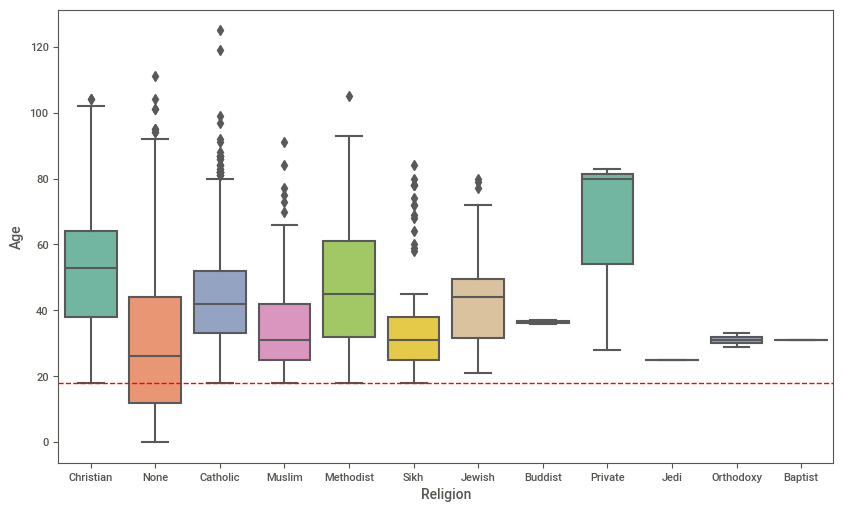

In [41]:
# plotting the Age on the charts with respect to religion
plt.figure(figsize=(10,6))
sns.boxplot(x = 'Religion', y = 'Age', data = df, palette='Set2')
plt.axhline(18,color='r',linestyle='dashed',linewidth=1)
plt.savefig('age_religion_boxplot_cleaned')

In [42]:
df['Religion'].value_counts()

None         4877
Christian    1976
Catholic      999
Methodist     580
Muslim        113
Sikh           79
Jewish         27
Private         3
Buddist         2
Orthodoxy       2
Jedi            1
Baptist         1
Name: Religion, dtype: int64

In [43]:
df.query("Religion == 'Private'") # get entries with Private religion

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4041,30,Pollard Road,Deborah,Powell,28,Head,Divorced,Female,Press sub,None,Private
5896,16,Perth Manor,Jill,Lowe,83,Head,Married,Female,Retired Health visitor,None,Private
5897,16,Perth Manor,Declan,Lowe,80,Husband,Married,Male,"Retired Nurse, mental health",None,Private


### cleaning Marital status column

In [44]:
df['Marital Status'].value_counts()

Single      3067
Married     2349
Divorced     872
Widowed      471
D              8
S              7
W              4
               1
M              1
Name: Marital Status, dtype: int64

In [45]:
# Rename 'W', 'D', 'S', 'M'  to 'Widowed', 'Divorced', 'Single','Married'  respectively using pandas map() method
marital_status = {'W':'Widowed', 'D':'Divorced', 'S':'Single', 'M':'Married', ' ': np.nan}
df['Marital Status'] = df['Marital Status'].replace(marital_status)

In [46]:
df['Marital Status'].unique()

array(['Married', 'Single', nan, 'Widowed', 'Divorced'], dtype=object)

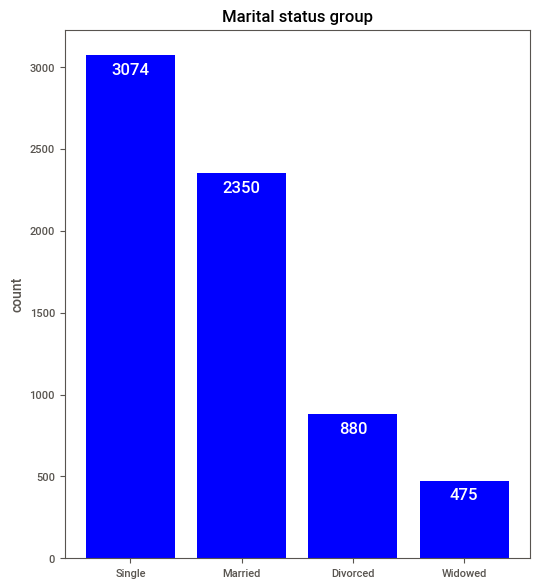

In [47]:
# Plot marital status distribution after cleaning
Marital_status_count = df['Marital Status'].value_counts()
plt.figure(figsize=(6,7))
plt.bar(Marital_status_count.index, Marital_status_count.values, color="blue")
plt.title('Marital status group')
plt.ylabel('count')

for i, value in enumerate(Marital_status_count.values):
    plt.text(i, value-90, str(value), fontsize=12, color='white',horizontalalignment='center', verticalalignment='center')
plt.savefig('marital_status_clean_01.png')
plt.show()

In [48]:
# number of missing rows
df['Marital Status'].isnull().sum() 

1881

In [49]:
df[df['Marital Status'].isnull()].head(20)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9,3,Dixon Drive,Ruth,Harris,17,Granddaughter,NaN,Female,Student,None,None
14,5,Dixon Drive,Jay,Booth,8,Son,NaN,Male,Student,None,None
28,5,Lee Isle,Mary,Burton,16,Daughter,NaN,Female,Student,None,None
30,6,Lee Isle,Sarah,Edwards,10,Daughter,NaN,Female,Student,None,None
34,8,Lee Isle,Cameron,Moore,16,Son,NaN,Male,Student,None,None
45,14,Lee Isle,Callum,Edwards,9,Son,NaN,Male,Student,None,None
52,17,Lee Isle,Barry,Perkins,7,Son,NaN,Male,Student,None,None
53,17,Lee Isle,Danielle,Perkins,5,Daughter,NaN,Female,Student,None,None
56,19,Lee Isle,Jeffrey,Thornton,5,Son,NaN,Male,Student,None,None
58,20,Lee Isle,Terence,Martin,8,Son,NaN,Male,Student,None,None


#### From the datafram above it looks like most of the rows with missing marital status are Minors with age below 18 yrs.
Plotting Marital status conditions over age to confirm this

<Figure size 1200x1000 with 0 Axes>

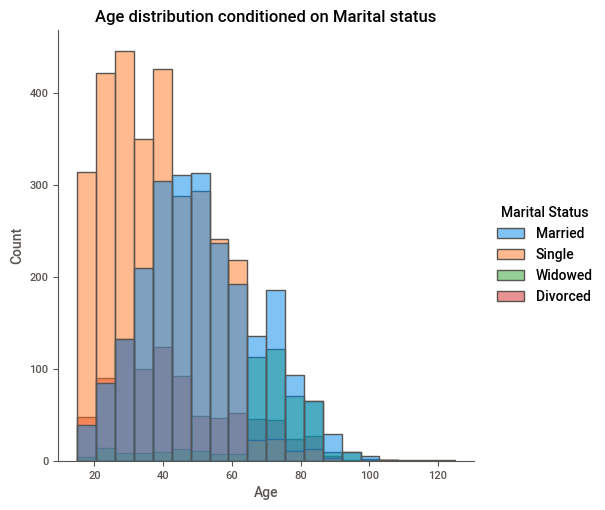

In [50]:
plt.figure(figsize=(12,10))
sns.displot(df, x='Age', bins=20, hue='Marital Status').set(title = 'Age distribution conditioned on Marital status')
#plt.savefig('age_dist_marital_status_01')
plt.show()

In [51]:
df.query("Age <18 and `Marital Status` == 'Married'") # check age < 18 and married

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3973,8,Pollard Road,Lesley,Ferguson,17,Head,Married,Female,Student,None,None
6477,135,Daisy Road,Judith,Williamson,15,Head,Married,Female,Student,None,None


In [52]:
df.query("Age <=18 and `Marital Status` == 'Widowed'") # check age < 18 and Widowed

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5728,37,Mahogany Road,Georgina,Walker,18,Daughter,Widowed,Female,Student,None,None
7243,41,Owen Neck,Katy,Parker,18,Daughter,Widowed,Female,Student,None,Catholic


#### Comment: 
1. Also from law UK law (GOV.UK) it is illegal for minor age below 18 to be marriad therefore missing rows for minors are replaced with 'Single' for Marital Status.

2. The 2 above queries shows an error in the data.
    * The above data points clearly show marital status is wrong. Age less than 18, married, is head of the family and a student as well. The marital status must be changed to 'Single'. 
    * The observation shows that as they are 18 years, Student and daughter in the household. Therefore i will replace their Marital status to Single or even drop them. Since i want to keep them i replace with 'Single'

In [53]:
#Fill all Age below 18 as single since it is illegal for Minors to be married
df['Marital Status'] = np.where(df['Age']<18, 'Single',df['Marital Status'])

In [54]:
df.loc[5728, 'Marital Status'] ='Single'
df.loc[7243, 'Marital Status'] ='Single'

<Figure size 1200x1000 with 0 Axes>

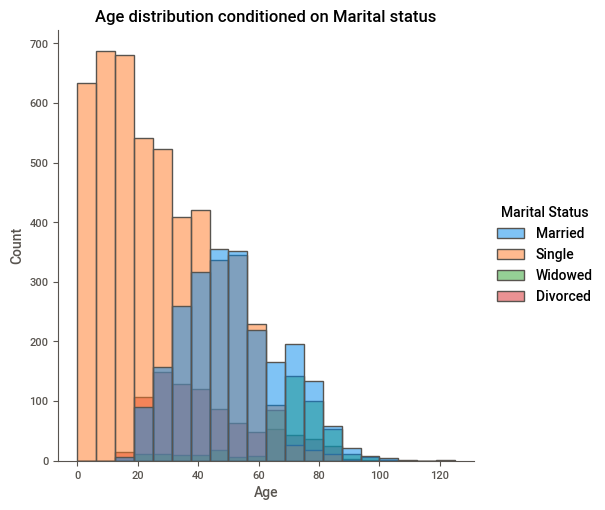

In [55]:
plt.figure(figsize=(12,10))
sns.displot(df, x='Age', bins=20, hue='Marital Status')\
        .set(title = 'Age distribution conditioned on Marital status')
plt.savefig('age_dist_marital_status_clean')
plt.show()


In [56]:
# check for remaning missing rows
df[df['Marital Status'].isnull()] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4520,5,Fish Drive,Cameron,Gray,19,None,NaN,Male,University Student,None,Christian


In [57]:
# Cameron 19 years old and a university. There is high chance he is single. 
df['Marital Status'] = np.where(df['Marital Status'].isnull(), 'Single', df['Marital Status'])

In [58]:
df['Marital Status'].isnull().sum()

0

In [59]:
Marital_status_count = df['Marital Status'].value_counts()
Marital_status_count

Single      4959
Married     2348
Divorced     880
Widowed      473
Name: Marital Status, dtype: int64

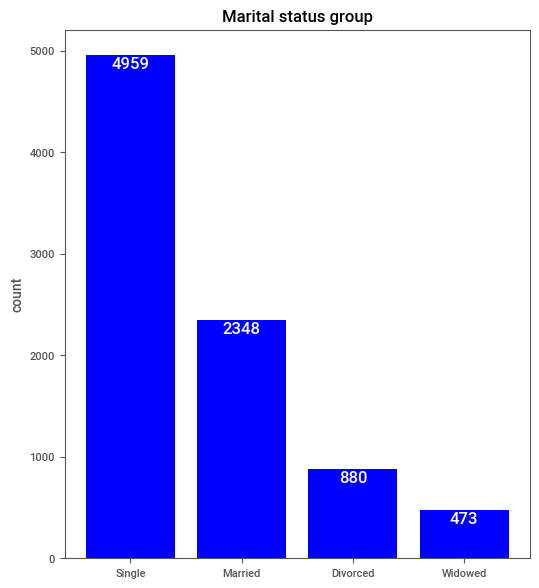

In [60]:
# Plot marital status distribution after cleaning
Marital_status_count = df['Marital Status'].value_counts()
plt.figure(figsize=(6,7))
plt.bar(Marital_status_count.index, Marital_status_count.values, color="blue")
plt.title('Marital status group')
plt.ylabel('count')

for i, value in enumerate(Marital_status_count.values):
    plt.text(i, value-90, str(value), fontsize=12, color='white',horizontalalignment='center', verticalalignment='center')
plt.savefig('marital_status_clean.png')
plt.show()

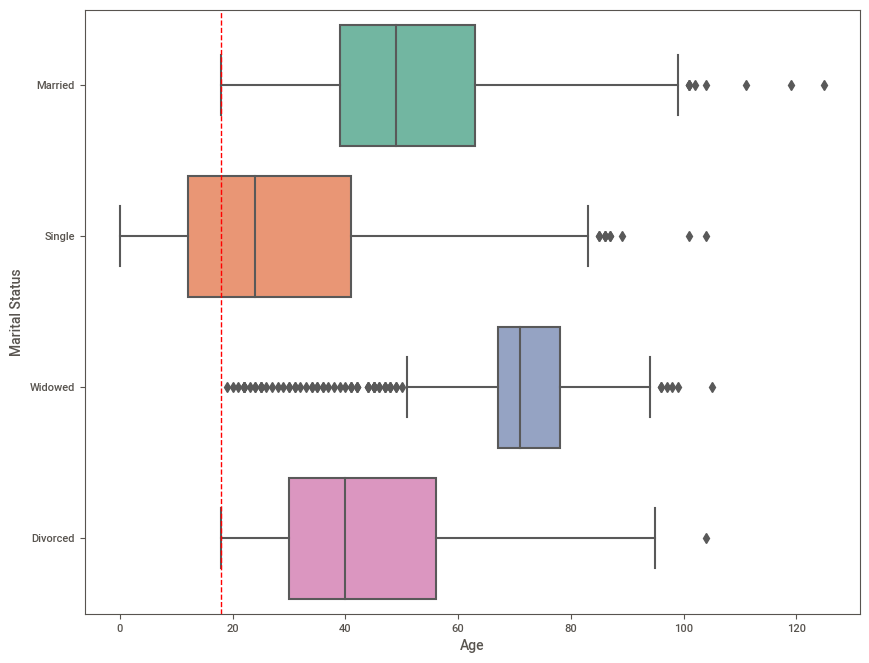

In [61]:
# plotting the Age on the charts with respect to Marital Status
plt.figure(figsize=(10,8))
sns.boxplot(x = 'Age', y = 'Marital Status', data = df, palette='Set2')
plt.axvline(18,color='r',linestyle='dashed',linewidth=1) #add Minor age line
#plt.savefig('age_marital_status_clean_boxplot')

### cleaning Gender column
Replace `["F","f","female"]` to `Female` and `["M","m","male"]` to `Male`

In [62]:
df['Gender'].value_counts()

Female    4447
Male      4001
male        70
female      42
F           32
M           29
f           24
m           12
             3
Name: Gender, dtype: int64

In [63]:
#Replace ["F","f","female"] to Female and ["M","m","male"] to Male
df["Gender"].replace(["F","f","female"], "Female", inplace = True )
df["Gender"].replace(["M","m","male"], "Male", inplace = True )
df["Gender"].replace([' '], np.nan, inplace = True )

In [64]:
df['Gender'].isnull().sum()

3

In [65]:
gender_count = df['Gender'].value_counts()

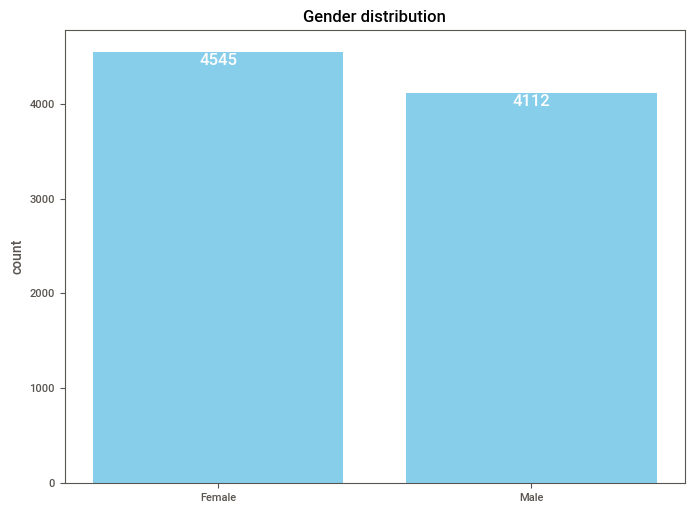

In [66]:
# Plot Gender count 
plt.figure(figsize=(8,6))
plt.bar(gender_count.index, gender_count.values, color='skyblue')
plt.title('Gender distribution')
plt.ylabel('count')

for i, value in enumerate(gender_count.values):
    plt.text(i, value-90, str(value), fontsize=12, color='white',horizontalalignment='center', verticalalignment='center')
plt.savefig('gender_01.png')
plt.show()

In [67]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [68]:
df[df['Gender'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
812,8,Dumnonia Drive,Patricia,Henry,21,Daughter,Single,NaN,University Student,None,Christian
5533,2,Patel Vista,Sian,Edwards,64,Lodger,Divorced,NaN,Theme park manager,None,Catholic
5668,37,Butcher Lake,Diana,Warner,72,Head,Married,NaN,Retired Barrister,None,None


#### There are only 3 missing rows for Gender which can be handled Manually
    Row index 812: Patricia is definately a Female as Relationaship is Daughter
    Row index 5533: Sian Edwards could be a male
    Row index 5668: Diana Warner could be a Female as name suggest

In [69]:
df.loc[812, 'Gender'] = 'Female'
df.loc[5533, 'Gender'] = 'Male'
df.loc[5668, 'Gender'] = 'Female'

In [70]:
gender_count = df['Gender'].value_counts()
gender_count

Female    4547
Male      4113
Name: Gender, dtype: int64

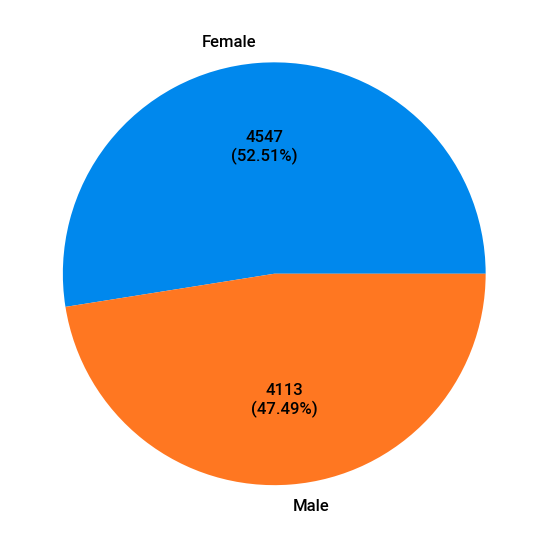

In [71]:
# function to get percent and counts of Gender
def my_fmt(x):
    return '{:.0f}\n({:.2f}%)'.format(total*x/100, x)

total = len(df['Gender']) # total gender count
plt.figure(figsize=(7,7))
#plt.title('Grouped by Gender')
plt.pie(gender_count.values, labels=gender_count.index, autopct=my_fmt, textprops={'fontsize':12})
plt.savefig('gender_clean.png')
plt.show()

### cleaning Infirmity column

Replace missing entries witht the mode and verify that 'None' is not applicable and not missing

In [72]:
df['Infirmity'].value_counts() # check the value count for each Infirmity category

None                   8590
Physical Disability      19
Disabled                 14
Blind                    10
                          9
Mental Disability         8
Deaf                      6
Unknown Infection         4
Name: Infirmity, dtype: int64

In [73]:
df[df['Infirmity']==' '] # filter empty infirmity rows

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
927,6,Tannery Valleys,Judith,Brady,52,Head,Married,Female,Environmental consultant,,Christian
1555,17,Severn Park,Jennifer,Sims,79,Wife,Married,Female,"Retired Loss adjuster, chartered",,Christian
2773,6,Francis Course,Kelly,Mann,53,None,Single,Female,"Administrator, local government",,Christian
2873,14,Sydney Avenue,Tracey,Ahmed,61,Head,Married,Female,Careers information officer,,None
5461,21,Causewaynail Avenue,Alexandra,Williams,58,Head,Married,Female,Horticultural consultant,,Christian
6365,67,Daisy Road,Gareth,Brown,39,Head,Single,Male,Paediatric nurse,,Christian
7245,41,Owen Neck,Emily,Parker,13,Daughter,Single,Female,Student,,None
7580,8,Wessex Haven,Eileen,Smith,61,Head,Single,Female,"Production designer, theatre/television/film",,Christian
8365,37,Oaktree Street,Joan,Burke,92,Head,Widowed,Female,Retired Database administrator,,Methodist


In [74]:
# replacing empty rows with the 'mode' 
df['Infirmity'] = np.where((df['Infirmity'] == ' '), df['Infirmity'].mode()[0], df['Infirmity'])

In [75]:
df['Infirmity'].value_counts()

None                   8599
Physical Disability      19
Disabled                 14
Blind                    10
Mental Disability         8
Deaf                      6
Unknown Infection         4
Name: Infirmity, dtype: int64

about 90% of the data are None for infirmity. this means that 'None' isn't missing but they don't have any infirmity hence 'Not Applicable'

### cleaning Occupation
Replace Empty rows with 'None' since its difficult to infere from data

In [76]:
df['Occupation'] = np.where((df['Occupation'] == ' '), 'None', df['Occupation'])

In [77]:
df['Occupation'].unique()

array(['Engineer, energy', 'Psychiatrist', 'Unemployed', ...,
       'Retired Textile designer', 'Retired Mudlogger',
       'Retired Designer, multimedia'], dtype=object)

In [78]:
df.query("Age>=65 and Occupation== 'Unemployed'").head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6,3,Dixon Drive,Marilyn,Warner,66,Head,Married,Female,Unemployed,None,Christian
148,20,Berry Hollow,June,Jarvis,68,Head,Single,Female,Unemployed,None,None
727,7,Whitehead Squares,Cheryl,Jones,65,Head,Widowed,Female,Unemployed,None,Christian
1148,13,Quayside Unions,Frances,Brady,66,Head,Widowed,Female,Unemployed,None,Catholic
1161,18,Quayside Unions,Kathleen,French,67,Head,Divorced,Female,Unemployed,None,None


from GOV.UK (https://www.gov.uk/state-pension-age), default retirement age (a forced retirement age of 65) is 65 though you can still work if you want to. Observation with age from 65 and unemployed may be retired therefore we chnage these rows to 'Retired'

In [79]:
np.where((df['Occupation'] == 'Unemployed') & (df['Age']>=65)) # index for age >= 65 and unemployed

(array([   6,  148,  727, 1148, 1161, 1220, 1313, 1599, 1668, 1759, 1861,
        1870, 1902, 1906, 1907, 1930, 2415, 2569, 3000, 3047, 3315, 3573,
        3798, 3935, 3949, 4149, 4227, 4263, 4265, 4465, 4477, 4714, 5009,
        5216, 5222, 5748, 5781, 6112, 6232, 6237, 6315, 6514, 6584, 6767,
        7024, 7317, 7415, 7540, 7550, 7732, 7788, 7801, 7882, 8068, 8176,
        8243, 8333, 8418, 8450, 8500]),)

In [80]:
df['Occupation'] = np.where((df['Occupation'] == 'Unemployed') & (df['Age']>=65), 'Retired', df['Occupation'])

#### cast house number to string

In [81]:
df['House Number'] = df['House Number'].astype('str') # House number is a unique code identifyiny every house 

In [82]:
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Dixon Drive,Leon,Clark,64,Head,Married,Male,"Engineer, energy",None,Christian
1,1,Dixon Drive,Lauren,Turnbull,63,Wife,Married,Female,Psychiatrist,None,Christian
2,2,Dixon Drive,Katie,Kirby,57,Head,Single,Female,Unemployed,None,Christian
3,2,Dixon Drive,Jordan,Kirby,30,Son,Single,Male,"Engineer, biomedical",None,Christian
4,2,Dixon Drive,Gareth,Kirby,28,Son,Single,Male,"Surveyor, building control",None,Christian


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8660 entries, 0 to 8659
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8660 non-null   object
 1   Street                         8660 non-null   object
 2   First Name                     8660 non-null   object
 3   Surname                        8660 non-null   object
 4   Age                            8660 non-null   int64 
 5   Relationship to Head of House  8660 non-null   object
 6   Marital Status                 8660 non-null   object
 7   Gender                         8660 non-null   object
 8   Occupation                     8660 non-null   object
 9   Infirmity                      8660 non-null   object
 10  Religion                       8660 non-null   object
dtypes: int64(1), object(10)
memory usage: 744.3+ KB


In [84]:
# save clean dataframe to csv file
df.to_csv('census_08_data_cleaned.csv') 

In [85]:
# visualize both raw data and clean data to compare
report_compare = sv.compare([data, 'census 08 data'],[df, 'Census 08 Data clean'], feat_cfg = feature_config)
report_compare.show_html('census_08_viz.html', layout='vertical')
#report_compare.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)

Report census_08_viz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Statistics Analysis on the clean data

In [86]:
#Re-loading clean data for furthur analysis
df = pd.read_csv('census_08_data_cleaned.csv', index_col=0)

In [87]:
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Dixon Drive,Leon,Clark,64,Head,Married,Male,"Engineer, energy",None,Christian
1,1,Dixon Drive,Lauren,Turnbull,63,Wife,Married,Female,Psychiatrist,None,Christian
2,2,Dixon Drive,Katie,Kirby,57,Head,Single,Female,Unemployed,None,Christian
3,2,Dixon Drive,Jordan,Kirby,30,Son,Single,Male,"Engineer, biomedical",None,Christian
4,2,Dixon Drive,Gareth,Kirby,28,Son,Single,Male,"Surveyor, building control",None,Christian


In [88]:
# statiscal info of numerical data
df.describe(exclude='object').transpose() 

,count,mean,std,min,25%,50%,75%,max
House Number,8660.0,40.095497,47.402764,1.0,9.0,22.0,47.0,214.0
Age,8660.0,37.557968,22.008644,0.0,20.0,37.0,53.0,125.0


In [89]:
# statiscal info of categorical data
df.describe(include='object').transpose() 

,count,unique,top,freq
Street,8660,105,Fish Drive,798
First Name,8660,366,Alison,44
Surname,8660,634,Smith,244
Relationship to Head of House,8660,23,Head,3417
Marital Status,8660,4,Single,4959
Gender,8660,2,Female,4547
Occupation,8660,1130,Student,1566
Infirmity,8660,7,None,8599
Religion,8660,12,None,4877


#### Age distribution

#### Age distirbution of Male and females

<Figure size 2800x1400 with 0 Axes>

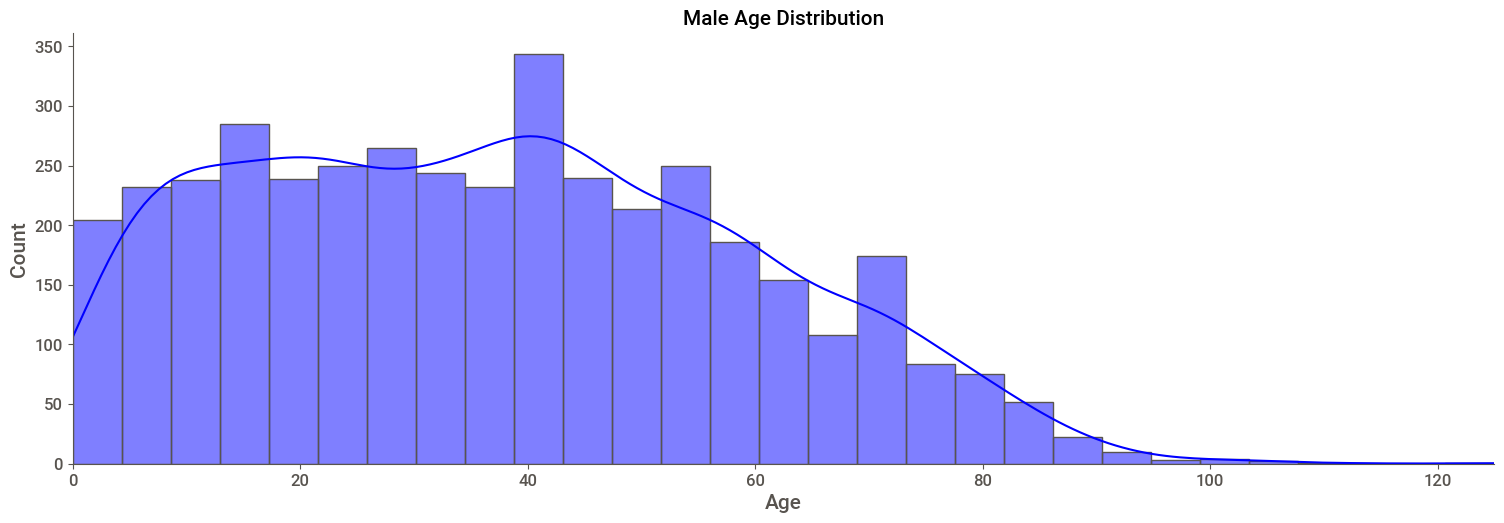

In [90]:
male_age = df[df['Gender']=='Male']['Age']
plt.figure(figsize=(14,7), dpi=200)
sns.displot(male_age, kind='hist', kde=True, height=5, aspect=3, color="blue")
plt.xlim(male_age.min(), male_age.max())
plt.title("Male Age Distribution", fontsize=15)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Males_age_distribution.png')
plt.show()

<Figure size 2800x1400 with 0 Axes>

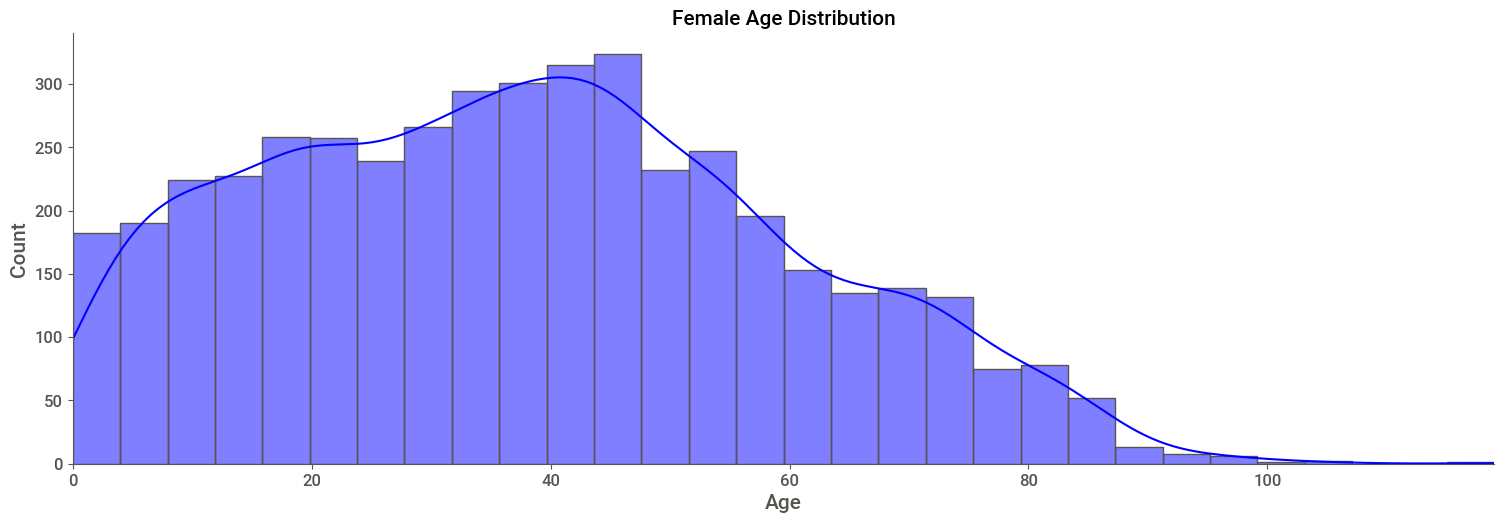

In [91]:
female_age = df[df['Gender']=='Female']['Age']
plt.figure(figsize=(14,7), dpi=200)
sns.displot(female_age, kind='hist', kde=True, height=5, aspect=3, color="blue")
plt.xlim(female_age.min(), female_age.max())
plt.title("Female Age Distribution", fontsize=15)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('females_age_distribution.png')
plt.show()

<Figure size 1200x1000 with 0 Axes>

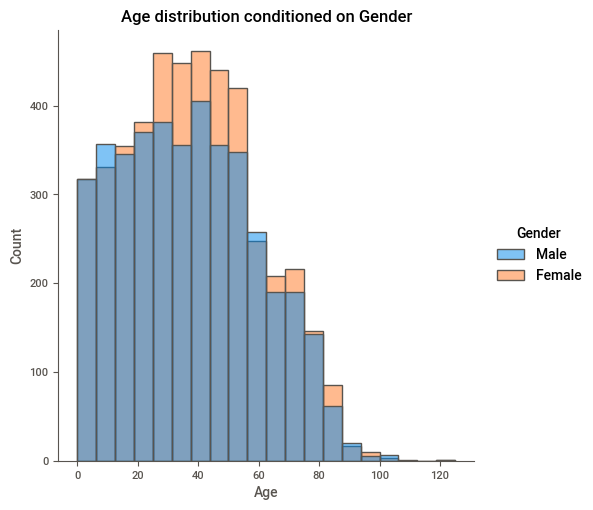

In [92]:
plt.figure(figsize=(12,10))
sns.displot(df, x='Age', bins=20, hue='Gender')\
        .set(title = 'Age distribution conditioned on Gender')
#plt.savefig('age_dist_gender_clean.png')
plt.show()

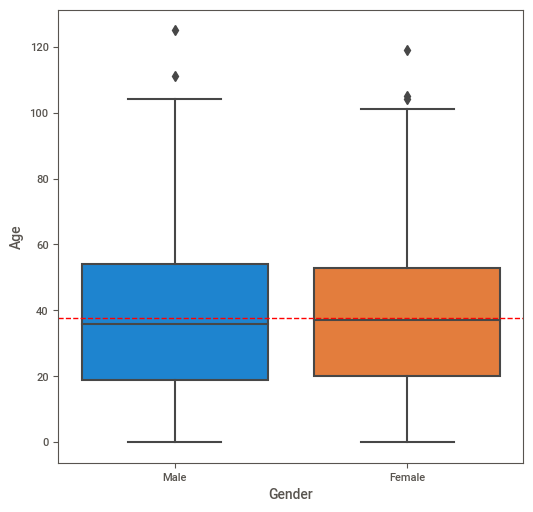

In [93]:
# plotting the Age on the charts with respect to sex
plt.figure(figsize=(6,6))
sns.boxplot(x = 'Gender', y = 'Age', data = df)
plt.axhline(df["Age"].mean(),color='r',linestyle='dashed',linewidth=1)

### Create Age Pyramide to visualize age groups

In [94]:
def age_groups(age):
    """Function to classify age group of each data entry"""
    if age < 10:
        return '0-9'
    elif age < 20:
        return '10-19'
    elif age < 30:
        return '20-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    elif age < 70:
        return '60-69'
    elif age < 80:
        return '70-79'
    elif age < 90:
        return '80-89'
    elif age < 100:
        return '90-99'
    else:
        return '>=100'

In [95]:
df['age_group'] = df['Age'].apply(age_groups)

In [96]:
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_group
0,1,Dixon Drive,Leon,Clark,64,Head,Married,Male,"Engineer, energy",None,Christian,60-69
1,1,Dixon Drive,Lauren,Turnbull,63,Wife,Married,Female,Psychiatrist,None,Christian,60-69
2,2,Dixon Drive,Katie,Kirby,57,Head,Single,Female,Unemployed,None,Christian,50-59
3,2,Dixon Drive,Jordan,Kirby,30,Son,Single,Male,"Engineer, biomedical",None,Christian,30-39
4,2,Dixon Drive,Gareth,Kirby,28,Son,Single,Male,"Surveyor, building control",None,Christian,20-29


In [97]:
#df.groupby('age_group')['Gender'].value_counts()

In [98]:
# Count number of Males and Females for each age group
# Make counts of Males negative to be able to construct age pyramide
gender_age_pyramide = df.pivot_table('Age', index='age_group', columns='Gender', aggfunc='count').reset_index()
gender_age_pyramide['Male'] = -gender_age_pyramide['Male']
age_group = list(reversed(gender_age_pyramide['age_group'].to_list())) # sort age group in descending order
gender_age_pyramide#.drop(columns='Gender')

Gender,age_group,Female,Male
0,0-9,488,-492
1,10-19,593,-591
2,20-29,626,-570
3,30-39,731,-620
4,40-49,755,-616
5,50-59,559,-491
6,60-69,357,-344
7,70-79,277,-264
8,80-89,139,-102
9,90-99,18,-15


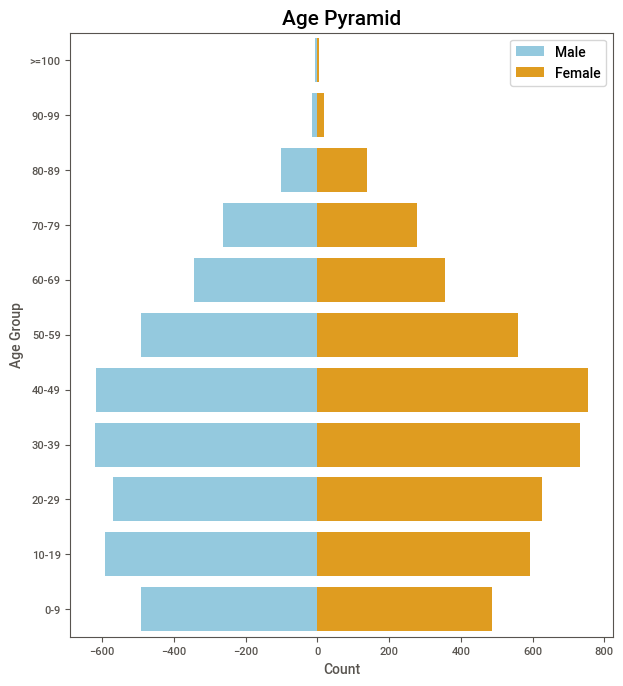

In [99]:
plt.figure(figsize=(7,8))
age_pyramid = sns.barplot(x='Male', y='age_group', data=gender_age_pyramide, order=age_group, color='skyblue', label='Male') 
age_pyramid = sns.barplot(x='Female', y='age_group', data=gender_age_pyramide, order=age_group, color='orange', label='Female')
age_pyramid.set(xlabel= 'Count', ylabel='Age Group') 

age_pyramid.legend()
plt.title('Age Pyramid', fontsize=15)
plt.savefig('age_pyramid.png')

### Adult to Minor ratio

In [100]:
# Add age_class columns: Minor ratio
df['Age_class'] = np.where(df['Age']<18, 'Minor','Adult')

In [101]:
age_class_count = df['Age_class'].value_counts()
age_class_count

Adult    6777
Minor    1883
Name: Age_class, dtype: int64

In [102]:
# function to get percent and counts of Gender
def my_fmt(x):
    return '{:.0f}\n({:.2f}%)'.format(total*x/100, x)

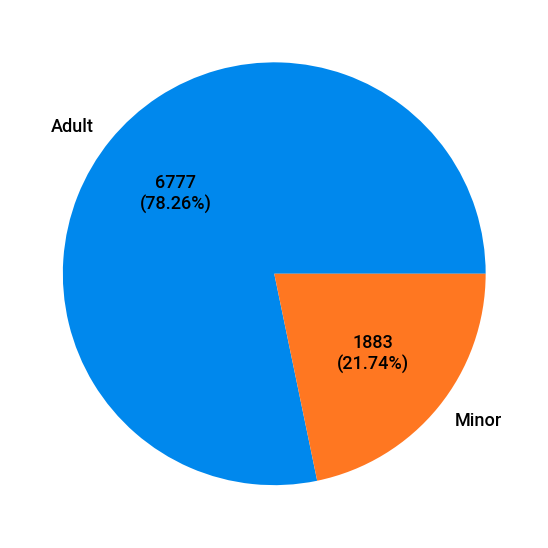

In [103]:
total = len(df['Age_class'])
plt.figure(figsize=(7,7))
#plt.title('Grouped by Age Class')
plt.pie(age_class_count.values, labels=age_class_count.index, autopct=my_fmt, textprops={'fontsize':13})
plt.savefig('adult_minor_pie_chart.png')
plt.show()

### Religious affiliations
We check the unique religions counts to see which is growing and which is shrinking

In [104]:
religions_count = df['Religion'].value_counts()
religions_count

None         4877
Christian    1976
Catholic      999
Methodist     580
Muslim        113
Sikh           79
Jewish         27
Private         3
Buddist         2
Orthodoxy       2
Jedi            1
Baptist         1
Name: Religion, dtype: int64

In [105]:
#Religions with few adherents can be assume to be fake or jokers. We change them to "None"
religion_list = {'Private':'None','Buddist':'None','Orthodoxy':'None','Jedi':'None','Baptist':'None'}
df['Religion'] = df['Religion'].replace(religion_list)

In [106]:
religions_count = df['Religion'].value_counts()
religions_count

None         4886
Christian    1976
Catholic      999
Methodist     580
Muslim        113
Sikh           79
Jewish         27
Name: Religion, dtype: int64

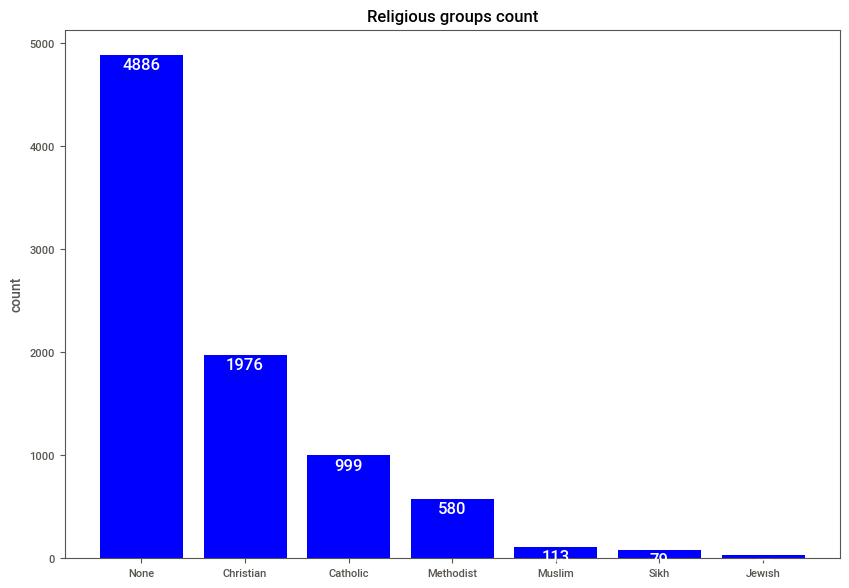

In [107]:
# Plot marital status distribution after cleaning
plt.figure(figsize=(10,7))
plt.bar(religions_count.index, religions_count.values, color = 'blue')
plt.title('Religious groups count')
plt.ylabel('count')
for i, value in enumerate(religions_count.values):
    plt.text(i, value-98, str(value), fontsize=12, color='white',horizontalalignment='center', verticalalignment='center')
plt.savefig('religious_group.png')
plt.show()

* Most are not religious. Though there is Catholic church there are also more christians and Methodist, therefore will be good getting other denominations 
* Get Age statistics for each religion type 

In [108]:
### Get mean, median, mode and range of age of the religions
age_stats = pd.DataFrame(columns=['Religion', 'Mean', 'Median', 'Mode', 'Min','Max'])
for i in df['Religion'].unique():
    mean_age = df[df['Religion'] == i]['Age'].mean()
    median_age = df[df['Religion'] == i]['Age'].median()
    mode_age= df[df['Religion'] == i]['Age'].mode()[0]
    min_age = df[df['Religion'] == i]['Age'].min()
    max_age = df[df['Religion'] == i]['Age'].max()
    # append to dataframe
    age_stats = age_stats.append({'Religion':i,\
                      'Mean':mean_age,\
                      'Median':median_age, \
                      'Mode':mode_age, \
                      'Min':min_age,\
                      'Max':max_age }, ignore_index=True)

In [109]:
age_stats

,Religion,Mean,Median,Mode,Min,Max
0,Christian,51.489879,53.0,57,18,104
1,None,29.481171,26.0,10,0,111
2,Catholic,43.899900,42.0,40,18,125
3,Muslim,36.008850,31.0,25,18,91
4,Methodist,47.353448,45.0,49,18,105
5,Sikh,36.329114,31.0,22,18,84
6,Jewish,44.555556,44.0,44,21,80


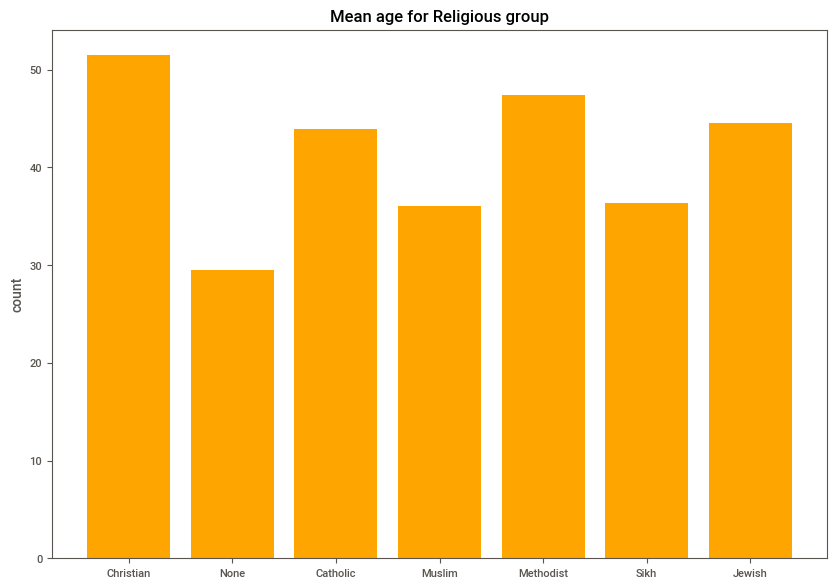

In [110]:
# Plot mean age of religious adherent
plt.figure(figsize=(10,7))
plt.bar(age_stats.Religion, age_stats.Mean, color = 'orange')
plt.title('Mean age for Religious group')
plt.ylabel('count')
plt.show()

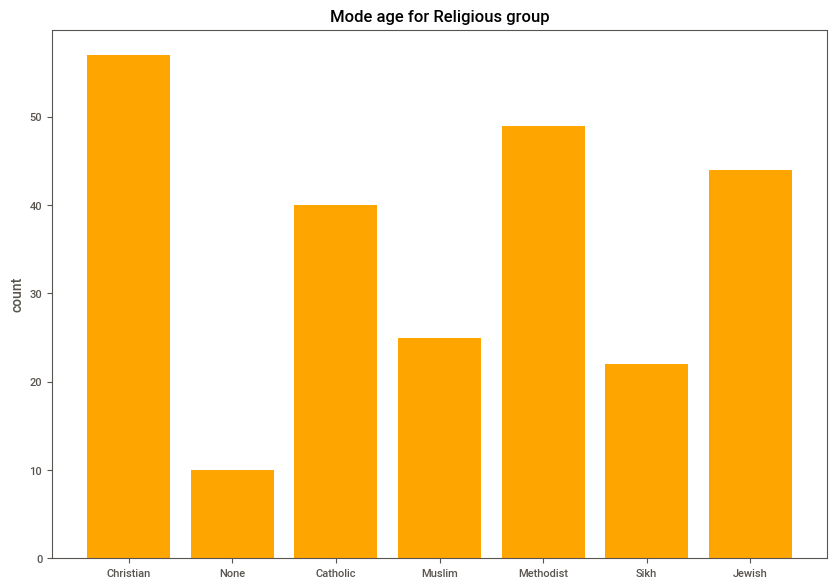

In [111]:
# Plot marital status distribution after cleaning
plt.figure(figsize=(10,7))
plt.bar(age_stats.Religion, age_stats.Mode, color = 'orange')
plt.title('Mode age for Religious group')
plt.ylabel('count')
plt.show()

### Analysis of Marital status

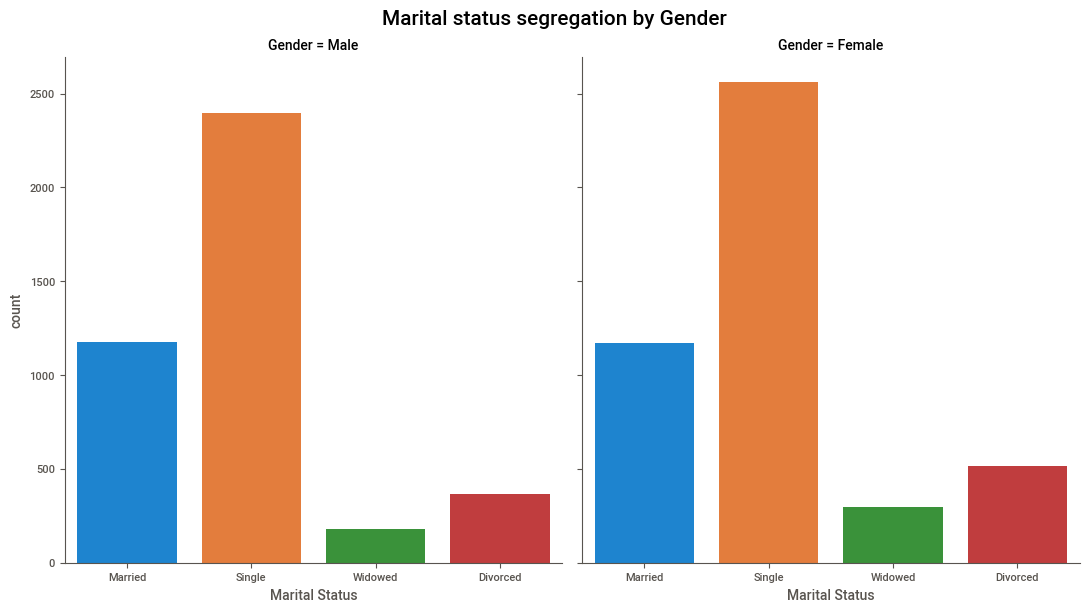

In [112]:
### marital status by gender
sns.catplot(data=df, x='Marital Status', col='Gender', kind='count', height=6, aspect=.9)
plt.subplots_adjust(top=0.90)
plt.suptitle('Marital status segregation by Gender\n', fontsize=15)
plt.savefig('marital_status_gender_seg.png')
plt.show()

* same married male vs female
* few more widowed females compared to Males. Vould it be that more males die?
* More divorced Females than Males. The Males relocate or emigrate after divorce. This may create vacant housing


In [113]:
Marital_status_count = df['Marital Status'].value_counts()

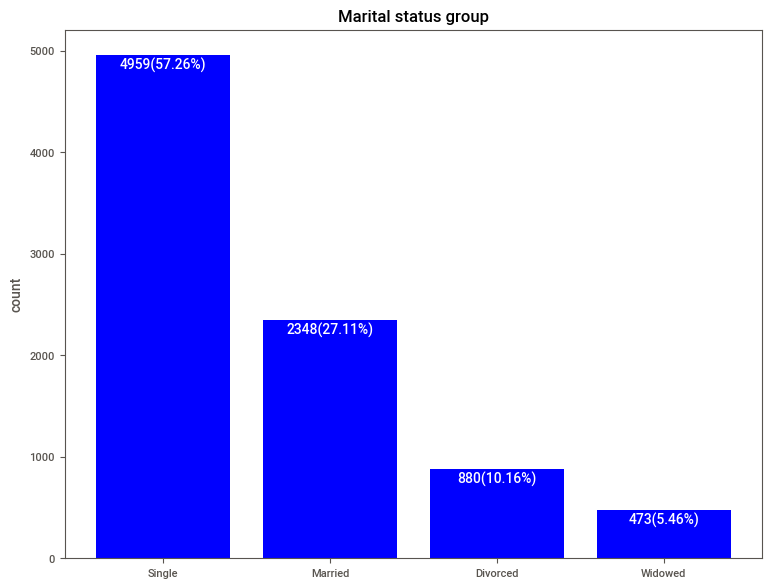

In [114]:
# compute percentages of each marital status
percentage = []
for i in Marital_status_count.values:
    pct = (i / Marital_status_count.sum()) * 100
    percentage.append(round(pct,2))

# Plot marital status distribution after cleaning
#Marital_status_count = df['Marital Status'].value_counts()
plt.figure(figsize=(9,7))
plt.bar(Marital_status_count.index, Marital_status_count.values, color = 'blue')
plt.title('Marital status group')
plt.ylabel('count')

for i, value in enumerate(Marital_status_count.values):
    var = f"{value}({percentage[i]}%)"
    plt.text(i, value-98, var, fontsize=10, color='white',horizontalalignment='center', verticalalignment='center')
plt.savefig('marital_status_clean.png')
plt.show()

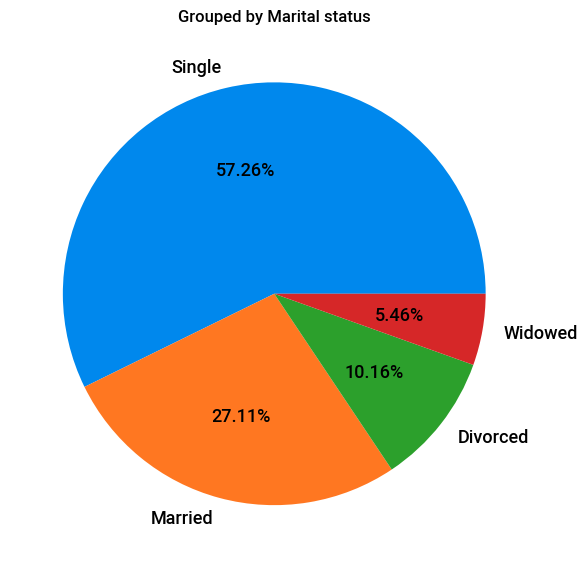

In [115]:
plt.figure(figsize=(7,7))
plt.title('Grouped by Marital status')
plt.pie(Marital_status_count.values, labels=['Single', 'Married', 'Divorced', 'Widowed'], 
        autopct='%1.2f%%', textprops={'fontsize':13})
plt.show()

In [116]:
household = df.groupby(['House Number', 'Street', 'Surname']).size().reset_index()
household.rename(columns={0:'Household'}, inplace=True)
household.shape

(4830, 4)

In [117]:
household

,House Number,Street,Surname,Household
0,1,Albionpush Drive,Bradley,1
1,1,Albionpush Drive,Clayton,2
2,1,Albionpush Drive,Kemp,1
3,1,Albionpush Drive,Stewart,1
4,1,Appletree Camp,Barnes,2
...,...,...,...,...
4825,213,Fish Drive,Walters,5
4826,214,Fish Drive,Jackson,1
4827,214,Fish Drive,Johnson,1
4828,214,Fish Drive,Price,1


In [118]:
household[household['Household']==9]

,House Number,Street,Surname,Household
111,1,Patel Vista,Barry,9
688,5,Swansea Road,O'Neill,9


In [119]:
df[df['Surname']=='Barry']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_group,Age_class
4296,40,Reynolds Lane,Katherine,Barry,36,Head,Single,Female,Geoscientist,None,Catholic,30-39,Adult
4297,40,Reynolds Lane,Kenneth,Barry,12,Son,Single,Male,Student,None,None,10-19,Minor
4298,40,Reynolds Lane,Hilary,Barry,9,Daughter,Single,Female,Student,None,None,0-9,Minor
4390,46,Archtap Drive,William,Barry,25,Head,Single,Male,Medical technical officer,None,None,20-29,Adult
5504,1,Patel Vista,Bernard,Barry,68,Head,Single,Male,"Retired Production assistant, television",None,None,60-69,Adult
5505,1,Patel Vista,Jane,Barry,28,Daughter,Divorced,Female,Armed forces operational officer,None,None,20-29,Adult
5506,1,Patel Vista,Jayne,Barry,27,Daughter,Divorced,Female,Information systems manager,None,None,20-29,Adult
5507,1,Patel Vista,Kathleen,Barry,26,Daughter,Single,Female,"Therapist, drama",None,None,20-29,Adult
5508,1,Patel Vista,Ruth,Barry,22,Daughter,Single,Female,University Student,None,None,20-29,Adult
5509,1,Patel Vista,Benjamin,Barry,19,Son,Divorced,Male,University Student,None,None,10-19,Adult


In [120]:
househould_counts = household['Household'].value_counts().reset_index().rename(columns={'index':'Household','Household':'Count' })
househould_counts

,Household,Count
0,1,2942
1,2,869
2,3,483
3,4,327
4,5,136
5,6,42
6,7,10
7,8,9
8,9,2
9,11,2


In [121]:
househould_counts.index.max()

15

<BarContainer object of 16 artists>

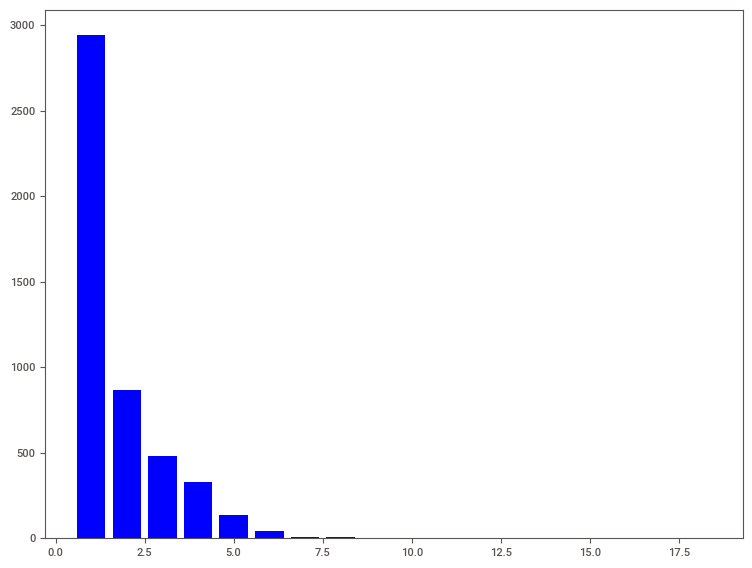

In [122]:
plt.figure(figsize=(9,7))
plt.bar(househould_counts.Household, househould_counts.Count, color = 'blue')

### Analyse of Occupation and  Commuters

In [123]:
# Add occupation category: Student(Minor), Student(University), Employed, Unemployed, Retired
occupation_cat = []
for x in df['Occupation']:
    #print(x.lower())
    if 'retired' in x.lower():
        occupation_cat.append('Retired')
    elif 'unemployed' in x.lower():
        occupation_cat.append('Unemployed')
    elif 'university student' in x.lower(): 
        occupation_cat.append('Student(University)')
    elif 'phd student' in x.lower(): 
        occupation_cat.append('Student(University)')
    elif 'student' in x.lower():
        occupation_cat.append('Student(Minor)')
    else:
        occupation_cat.append('Employed')

In [124]:
df['occupation_category']= pd.Series(occupation_cat)

In [125]:
df.columns

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion', 'age_group', 'Age_class',
       'occupation_category'],
      dtype='object')

In [126]:
occupation_cat_count = df['occupation_category'].value_counts()
occupation_cat_count

Employed               5034
Student(Minor)         1566
Retired                 975
Student(University)     548
Unemployed              537
Name: occupation_category, dtype: int64

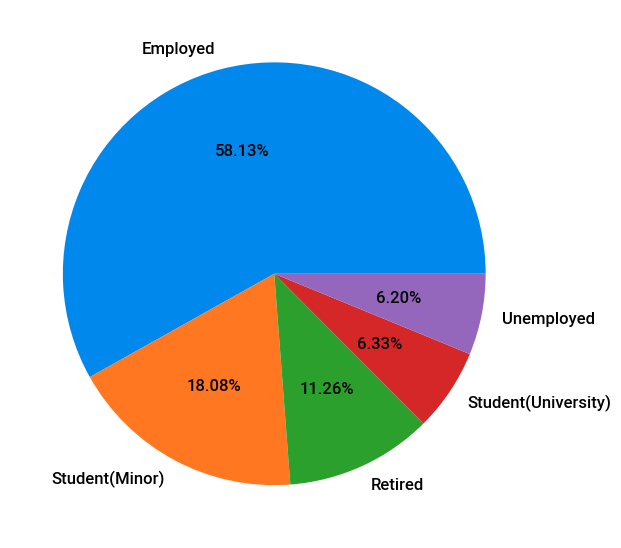

In [127]:

total = len(df['occupation_category'])
plt.figure(figsize=(7,7))
plt.pie(occupation_cat_count.values, labels=occupation_cat_count.index, autopct='%1.2f%%', textprops={'fontsize':12})
plt.savefig('retired_pie_chart.png')
plt.show()

### Analysis students

In [128]:
students_counts = df[df['occupation_category'].str.contains('Student')]['occupation_category'].value_counts()
students_counts

Student(Minor)         1566
Student(University)     548
Name: occupation_category, dtype: int64

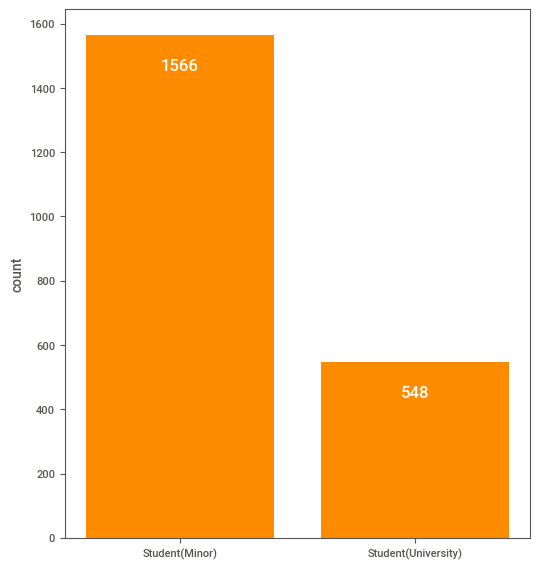

In [129]:
# Plot marital status distribution after cleaning
plt.figure(figsize=(6,7))
plt.bar(students_counts.index, students_counts.values, color = 'darkorange')
#plt.title('Student level group')
plt.ylabel('count')
for i, value in enumerate(students_counts.values):
    plt.text(i, value-98, str(value), fontsize=12, color='white',horizontalalignment='center', verticalalignment='center')
plt.savefig('student_level_group.png')
plt.show()

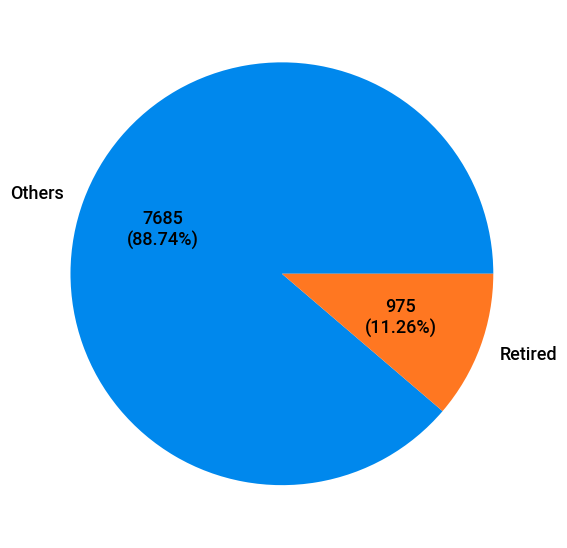

In [130]:
df['Retired'] = np.where((df['Occupation'].str.contains('Retired', case=False)), 1, 0)
retired_counts = df['Retired'].value_counts()
total = len(df['Retired'])
plt.figure(figsize=(7,7))
#plt.title('Grouped by Age Class')
plt.pie(retired_counts.values, labels=['Others', 'Retired'], autopct=my_fmt, textprops={'fontsize':13})
plt.savefig('retired_pie_chart.png')
plt.show()

### Analysing the Birth rate of the town using the data

We will need to determine the number of children aged zero. This should be straight forward from the cleaned age data set. Compute this number now.
We can also attempt to compute the birth rate per 100,000.
To do this, we need the number of potential women of “child bearing age”. This is much more of an assumption. We could assume that this is all women between 25-29 as used in some instances to project forward the expected number of births.

In [131]:
#df.query('Age == 0')

In [132]:
children_aged_zero = df.query('Age == 0').shape[0] # get number of children aged zero
potential_women = df.query('25 <= Age <= 29').shape[0] # number of potential women: assuming child bearing age between 25-29
birth_rate = children_aged_zero/potential_women # calc birth rate
birth_rate_per_100000 = birth_rate * 100
print(f"Number of babies aged zero: {children_aged_zero}\nNumber of potential women: {potential_women}\n\
Birth rate: {birth_rate:.2f}\nBirth rate per 100000 women: {birth_rate_per_100000:.2f}")


Number of babies aged zero: 75
Number of potential women: 586
Birth rate: 0.13
Birth rate per 100000 women: 12.80


### Evolving birth rate
evaluate this by the number of children aged 4 as a fraction of the number of women aged 30-34

In [133]:
children_aged_4 = df.query('Age == 4').shape[0] # get number of children aged 4
women_age_30_34 = df.query('30 <= Age <= 34').shape[0] # Number women aged 30 to 34
evolving_birth_rate = children_aged_4/women_age_30_34 # calc birth rate
ebr_per_100000 = evolving_birth_rate * 100 #birth rate per 100,000 persons
print(f"Number of children aged 4: {children_aged_4}\nNumber women aged 30 to 34: {women_age_30_34}\n\
Evolving birth rate: {evolving_birth_rate:.2f}\nEvolving brith rate per 100000 women: {ebr_per_100000:.2f}")

Number of children aged 4: 80
Number women aged 30 to 34: 658
Evolving birth rate: 0.12
Evolving brith rate per 100000 women: 12.16


The birth rate per 100,000 women is low(12,80). The evolving birth rate confirms this as there are 12.16 children per 100,000 women.

### Death Rate
One way we could try to compute a death rate is to look at the differential of the number of people in one age bracket, compared to a younger one. Therefore, computing the number of people in the age range 56-60, versus 61-65.

In [134]:
df.query('56 <= Age <= 60').head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_group,Age_class,occupation_category,Retired
2,2,Dixon Drive,Katie,Kirby,57,Head,Single,Female,Unemployed,None,Christian,50-59,Adult,Unemployed,0
73,2,Berry Hollow,Lindsey,Archer,56,Head,Married,Female,"Administrator, charities/voluntary organisations",None,Catholic,50-59,Adult,Employed,0
74,2,Berry Hollow,Patrick,Long,58,Husband,Married,Male,"Scientist, forensic",None,None,50-59,Adult,Employed,0
80,3,Berry Hollow,Rosemary,Wood,59,Lodger,Single,Female,Nature conservation officer,None,Christian,50-59,Adult,Employed,0
125,14,Berry Hollow,Jenna,Adams,56,Lodger,Divorced,Female,Statistician,None,Christian,50-59,Adult,Employed,0


In [135]:
aged_56_to_60 = df.query('56 <= Age <= 60').shape[0] # Number old people aged 56 to 60
aged_61_to_65 = df.query('61 <= Age <= 65').shape[0] # Number old people aged 61 to 65
deaths = aged_61_to_65 - aged_56_to_60 # people who have died over a 5 year period
deaths_per_yr = deaths/5 # death rate per year annum
deaths_per_yr

-24.8

Making the assumption that the number of people in each of these 2 generations was the same when they were the same age. We find the difference and the death rate. Negative difference is the number of deaths

* compute the number of people in the age from 56 over a 5 year increament. e.g 56-60
* get the different between two adjacent age bands and divide by 5 to get the death rate.

In [136]:
age_band = ['56-60','61-65','66-70','71-75','76-80','81-85','86-90','91-95','96-100'] # age group to use for death rate
age_band_count = [] # the number of people within the age group
for i in age_band:
    age_start = int(i.split('-')[0])
    age_end = int(i.split('-')[1])
    age_count = df.query('@age_start <= Age <= @age_end').shape[0]
    age_band_count.append(age_count)

In [137]:
# create dataFrame of the age counts for each age group and get number of deaths
#Assumption: The number of people in each of these 2 generations was the same when they were the same age
df_age_band = pd.DataFrame(list(zip(age_band, age_band_count)),
             columns =['Age_group', 'Number of people'])
df_age_band['Deaths'] = df_age_band['Number of people'].diff() # get deaths as age range difference
df_age_band['Death rate per annum'] = df_age_band['Deaths']/5 # divide deaths by 5 years to get the rate per annum.
df_age_band

,Age_group,Number of people,Deaths,Death rate per annum
0,56-60,480,NaN,NaN
1,61-65,356,-124.0,-24.8
2,66-70,333,-23.0,-4.6
3,71-75,304,-29.0,-5.8
4,76-80,198,-106.0,-21.2
5,81-85,153,-45.0,-9.0
6,86-90,60,-93.0,-18.6
7,91-95,21,-39.0,-7.8
8,96-100,7,-14.0,-2.8


In [138]:
#total death rate across all age groups per annum
Death_rate = round(df_age_band['Death rate per annum'].sum(),2)
print(f"Total Death rate per annum : {-Death_rate}")
print(f"Total Death rate per 100,000 persons: {-Death_rate*100}")

Total Death rate per annum : 94.6
Total Death rate per 100,000 persons: 9460.0


### Migration analysis

In [139]:
### Get all lodgers and visitors
df_lodger = df.query("`Relationship to Head of House`== 'Lodger'")
df_visitor = df.query("`Relationship to Head of House` == 'Visitor'")
print(f"There are {df_lodger.shape[0]} Lodgers and {df_visitor.shape[0]} Visitors ")

There are 271 Lodgers and 21 Visitors 


In [140]:
## percent of lodgers and visitors of the total population
lodger_visitors = df_lodger.shape[0]+df_visitor.shape[0]
lodger_visitors_percent_of_population = lodger_visitors/df.shape[0]
print(f"Percent of lodgers and visitors of the total population: {lodger_visitors_percent_of_population*100:.2f}%")

Percent of lodgers and visitors of the total population: 3.37%


In [141]:
df_lodger.tail()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_group,Age_class,occupation_category,Retired
8438,32,Davies Drive,Steven,Watson,36,Lodger,Single,Male,Broadcast engineer,None,None,30-39,Adult,Employed,0
8510,1,Cook Turnpike,Marcus,Richardson,47,Lodger,Divorced,Male,"Horticulturist, commercial",None,Catholic,40-49,Adult,Employed,0
8545,11,Cook Turnpike,Raymond,Lewis,25,Lodger,Single,Male,Environmental manager,None,None,20-29,Adult,Employed,0
8558,1,Hill Hollow,Luke,Hill,59,Lodger,Single,Male,Chiropodist,None,Christian,50-59,Adult,Employed,0
8587,1,Hopkins Manorhouse,Patrick,Austin,37,Lodger,Single,Male,Mining engineer,None,Methodist,30-39,Adult,Employed,0


In [142]:
## Count of Lodgers Marital status
df_lodger['Marital Status'].value_counts()

Single      202
Divorced     63
Widowed       6
Name: Marital Status, dtype: int64

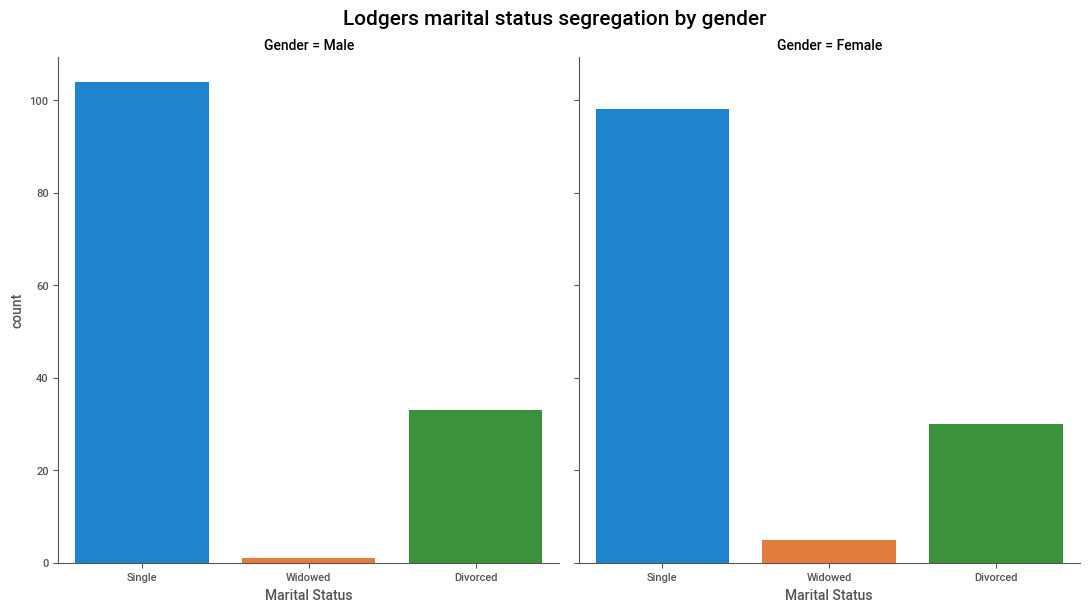

In [143]:
### Lodgers marital status segregation by gender
sns.catplot(data=df_lodger, x='Marital Status', col='Gender', kind='count', height=6, aspect=.9)
plt.subplots_adjust(top=0.90)
plt.suptitle('Lodgers marital status segregation by gender\n', fontsize=15)
#plt.savefig('marital_status_gender_seg.png')
plt.show()

In [144]:
## university students who are lodgers
df_university_lodger = df.query("`Relationship to Head of House` == 'Lodger' and Occupation=='University Student'")

In [145]:
df_university_lodger.shape

(18, 15)

In [146]:
df_lodger_divorced = df.query("`Relationship to Head of House` == 'Lodger' and `Marital Status`=='Divorced'")

In [147]:
df_lodger_divorced.shape

(63, 15)

In [148]:
df_lodger_divorced.head(10)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_group,Age_class,occupation_category,Retired
81,3,Berry Hollow,Lisa,Parker,43,Lodger,Divorced,Female,"Engineer, materials",None,Christian,40-49,Adult,Employed,0
96,6,Berry Hollow,Kevin,Hammond,40,Lodger,Divorced,Male,Risk manager,None,Christian,40-49,Adult,Employed,0
125,14,Berry Hollow,Jenna,Adams,56,Lodger,Divorced,Female,Statistician,None,Christian,50-59,Adult,Employed,0
178,28,Berry Hollow,Patrick,Foster,44,Lodger,Divorced,Male,"Exhibitions officer, museum/gallery",None,Catholic,40-49,Adult,Employed,0
340,71,Berry Hollow,Dylan,Slater,28,Lodger,Divorced,Male,Special effects artist,None,None,20-29,Adult,Employed,0
509,116,Berry Hollow,Roger,Francis,48,Lodger,Divorced,Male,Printmaker,None,Christian,40-49,Adult,Employed,0
645,8,Roberts Street,Dawn,Barker,60,Lodger,Divorced,Female,"Psychologist, educational",None,Christian,60-69,Adult,Employed,0
856,5,King Station,Shane,Bradley,45,Lodger,Divorced,Male,Food technologist,None,Christian,40-49,Adult,Employed,0
1045,37,Tannery Valleys,James,Goodwin,51,Lodger,Divorced,Male,Estate manager/land agent,None,Christian,50-59,Adult,Employed,0
1050,38,Tannery Valleys,Dominic,Edwards,28,Lodger,Divorced,Male,"Civil engineer, contracting",None,None,20-29,Adult,Employed,0


In [149]:
df['occupation_category'].unique()

array(['Employed', 'Unemployed', 'Retired', 'Student(Minor)',
       'Student(University)'], dtype=object)

In [150]:
df.groupby('age_group')['occupation_category'].value_counts()

age_group  occupation_category
0-9        Student(Minor)          555
           Employed                425
10-19      Student(Minor)         1011
           Student(University)     162
           Employed                 10
           Unemployed                1
20-29      Employed                739
           Student(University)     383
           Unemployed               74
30-39      Employed               1196
           Unemployed              152
           Student(University)       3
40-49      Employed               1206
           Unemployed              165
50-59      Employed                946
           Unemployed              104
60-69      Employed                512
           Retired                 148
           Unemployed               41
70-79      Retired                 541
80-89      Retired                 241
90-99      Retired                  33
>=100      Retired                  12
Name: occupation_category, dtype: int64

### References
1. Binning ages: https://datagy.io/pandas-cut-qcut/
2. UK Pension age: https://www.gov.uk/state-pension-age
3. https://www.geeksforgeeks.org/